GLare MOdeling with Remote Ocean Surface observations - GLAMOROS

Оценка контрастов поверхностных проявлений океанических явлений по изображениям солнечного блика

Программа представляет собой реализацию разработанного авторами метода восстановления пространственных вариаций среднеквадратичного наклона (СКН) морской поверхности по изображениям солнечного блика, получаемых со спутниковых оптических сканеров.
Поскольку количество отражённой радиации в районе солнечного блика зависит от СКН, любое явление, наблюдаемое на поверхности океана (как нефтяные и биогенные слики, внутренние волны, фронты течений, вихри, грибовидные структуры и др.), приводящее к вариациям СКН, возможно наблюдать в контрастах яркости. В рамках предложенного алгоритма, восстановление пространственных вариаций СКН по измеренным контрастам яркости в солнечном блике производится с помощью передаточной функции, которая может быть определена как эмпирически – по осредненной форме солнечного блика, так и теоретически, – по априорно заданной модели распределения вероятности наклонов морской поверхности.

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import widgets
# [widget for widget in dir(widgets) if widget.endswith('Widget')]

### Reading data

In [103]:
from cB4S2 import S2_MSI_Image

In [104]:
pn = '/media/SOLabNFS2/tmp/sentinel-2_test/S2A_OPER_PRD_MSIL1C_PDMC_20160108T151349_R135_V20160108T082023_20160108T082023.SAFE/'

In [105]:
import os
from numpy import float16, double
granules = os.listdir(pn + 'GRANULE/')
fn = granules[5]

In [106]:
S2_MSI_granule_path = pn + 'GRANULE/' + fn + '/'
# namespace           = '/home/mag/Documents/repos/solab/PySOL/notebooks/Sentinel-2/S2_PDI_Level-1C_Tile_Metadata.xsd'
namespace="https://psd-12.sentinel2.eo.esa.int/PSD/S2_PDI_Level-1C_Tile_Metadata.xsd"
# import_bands=['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
import_bands        = ["B05","B06","B07"]
target_resolution   = 20.0
numpy_type          = float16
interpolation_order = 1
data_mode           = "dense"
driver              = "OpenJpeg200"

In [107]:
S2_img = S2_MSI_Image(S2_MSI_granule_path = S2_MSI_granule_path,
                      import_bands        = import_bands,
                      data_mode           = data_mode,
                      target_resolution   = target_resolution,
                      numpy_type          = numpy_type,
                      interpolation_order = interpolation_order)

Load S2 MSI data from:/media/SOLabNFS2/tmp/sentinel-2_test/S2A_OPER_PRD_MSIL1C_PDMC_20160108T151349_R135_V20160108T082023_20160108T082023.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_SGS__20160108T115454_A002849_T35HLA_N02.01/
Final shape for each channel: [5490, 5490]
Reading: /media/SOLabNFS2/tmp/sentinel-2_test/S2A_OPER_PRD_MSIL1C_PDMC_20160108T151349_R135_V20160108T082023_20160108T082023.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_SGS__20160108T115454_A002849_T35HLA_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_SGS__20160108T115454_A002849_T35HLA_B05.jp2
Read band B05 in 8.67s, pure load time:7.72s, resample time: 0.95s, zoom: 1.000, final shape: [5490, 5490], index: 0
Reading: /media/SOLabNFS2/tmp/sentinel-2_test/S2A_OPER_PRD_MSIL1C_PDMC_20160108T151349_R135_V20160108T082023_20160108T082023.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_SGS__20160108T115454_A002849_T35HLA_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_SGS__20160108T115454_A002849_T35HLA_B06.jp2
Read band B06 in 8.62s, pure load time:7.66s, resample time: 0.96s, zoom: 1.0

### Interactive Plotting

In [108]:
# %matplotlib inline

def ntrctv_imshow(p = 'hh', vmi=-1., vma=1., cmap='bone', crop='[:,:]', dimNum=None):
    # check if data type is dictionary and there is no wind
    if type(data) == dict and all(k!='wind_speed' for k in data.iterkeys()):
        plt.figure(figsize=(8,8*double(data[p].shape[0])/double(data[p].shape[1])))
        plt.imshow(eval("data[p]"+str(crop)), vmin=vmi, vmax=vma)
    elif type(data) == dict and any(k=='wind_speed' for k in data.iterkeys()):
        plt.figure(figsize=(8,8*double(data[p].shape[0])/double(data[p].shape[1])))
        X,Y = meshgrid( arange(0,eval("data[p]"+str(crop)).shape[1]),arange(0,eval("data[p]"+str(crop)).shape[0]) )
        U = (data['u'])
        V = (data['v'])
        U = eval("U"+str(crop))
        V = eval("V"+str(crop))
        scl = 100
        plt.quiver(X[::scl,::scl], Y[::scl,::scl], U[::scl,::scl], V[::scl,::scl])
        plt.imshow(eval("data[p]"+str(crop)), vmin=vmi, vmax=vma)
        plt.axis('tight')
    elif type(data) != dict and len(data.shape)>2:
        plt.figure(figsize=(8,8*double(data[:,:,0].shape[0])/double(data[:,:,0].shape[1])))
        plt.imshow(eval("data[:,:,"+str(dimNum)+"]"+str(crop)), vmin=vmi, vmax=vma)
    elif type(data) != dict:
        plt.figure(figsize=(8,8*double(data.shape[0])/double(data.shape[1])))
        plt.imshow(eval("data"+str(crop)), vmin=vmi, vmax=vma)
    plt.colorbar()
    plt.set_cmap(cmap)    


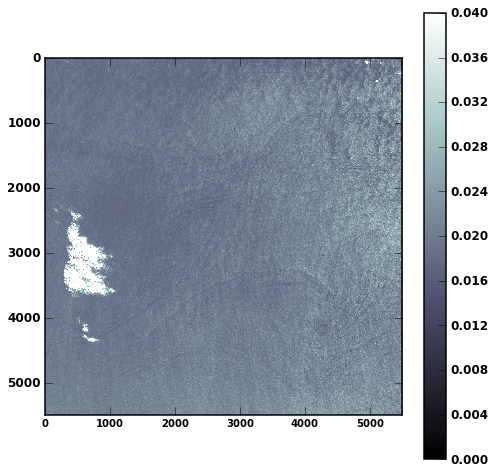

In [112]:
scale = 1
data = S2_img.data[::scale,::scale]

ntrctv = widgets.interact(ntrctv_imshow, \
                          vmi=widgets.FloatSlider(min=0, max=0.1, value=0, step=0.01), \
                          vma=widgets.FloatSlider(min=0, max=0.1, value=0.05, step=0.01), \
                          cmap = ['Greys_r', 'bone', 'RdBu_r'], crop = '[:,:]', \
                          dimNum=['0','1','2']);

In [110]:
import numpy as np
import scipy as sp

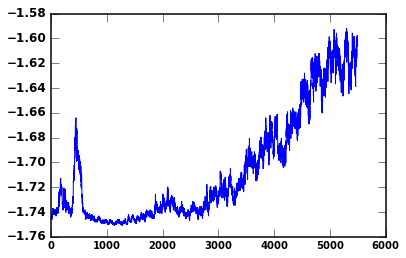

In [111]:
plt.close('all')
plt.plot( np.log10(S2_img.data[2000:2500,:,0])[::2].mean(axis=0))